<a href="https://colab.research.google.com/github/louzeiro/USP2023Sem01/blob/main/Compara%C3%A7%C3%A3o_de_classificadores_na_base_de_dados_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No mesmo arquivo e com a mesma base de dados de treinamento e mesmo número de preditoras, você deve utilizar os métodos:

- Naive Bayes
- KNN
- Árvore de decisão e extensões
- SVM
- outros (opci

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn import naive_bayes, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Leitura dos dados


In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado_de_Maquina/main/Dados/iris.csv')
dados.tail(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Visualização e Exploração dos dados

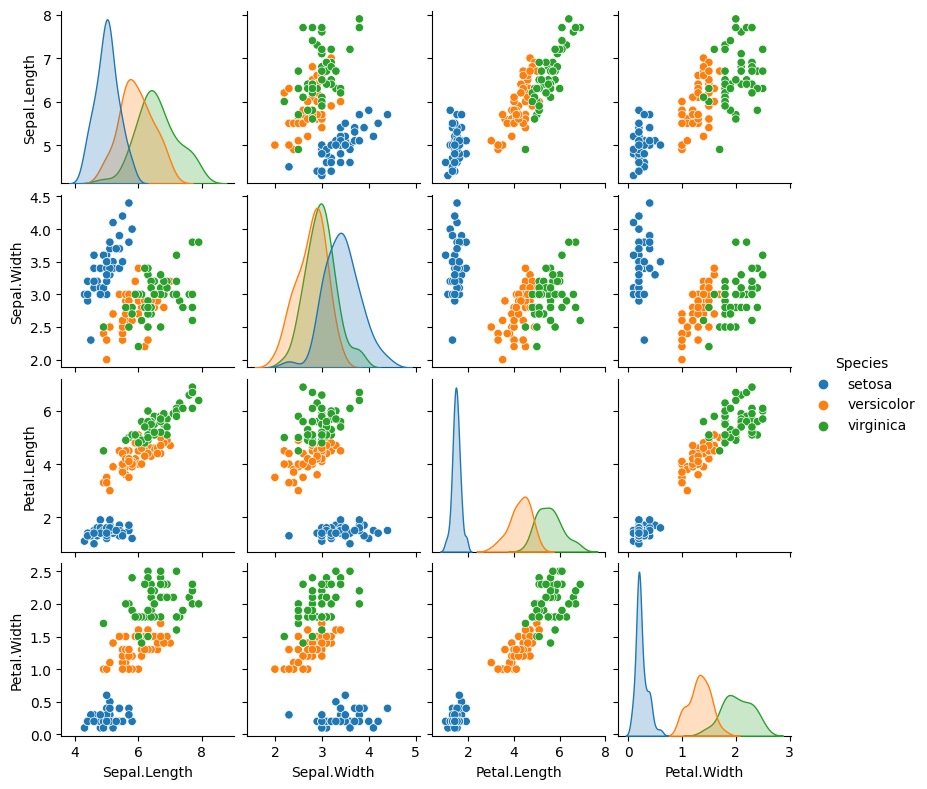

In [3]:
sns.pairplot(dados, hue='Species', height=2)

# Separando o conjunto de dados

In [4]:
X = dados.iloc[:,0:2].values 
Y = dados.iloc[:, 4].values

cv = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=11885075)

# retorna os índices de treino e teste
train_index, test_index = list( cv.split(X, Y) )[0]

# retorna as partições de treino e teste de acordo com os índices
X_train, X_test = X[train_index, :], X[test_index, :];
Y_train, Y_test = Y[train_index], Y[test_index];

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )
print("\nQtd. de dados de cada classe (treinamento)")
cTrain, counts_cTrain = np.unique(np.sort(Y_train), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTrain[i],counts_cTrain[i],(counts_cTrain[i]/len(Y_train))*100 ) )

# imprime a porcetagem de dados de teste de cada classe
print("\nQtd. de dados de cada classe (teste)")
cTest, counts_cTest = np.unique(np.sort(Y_test), return_counts=True)
for i in range( len(cTrain) ):
    print('\tClasse %s: %d (%1.2f%%)' %( cTest[i],counts_cTest[i],(counts_cTest[i]/len(Y_test))*100 ) )

# Listas de acurácia e classificadores
classifiers=[]
ac_sc = []
rc_sc = []
pr_sc = []
f1_sc = []
Y_pred_ = []

Qtd. dados de treinamento: 105 (70.00%)
Qtd. de dados de teste: 45 (30.00%)

Qtd. de dados de cada classe (treinamento)
	Classe setosa: 35 (33.33%)
	Classe versicolor: 35 (33.33%)
	Classe virginica: 35 (33.33%)

Qtd. de dados de cada classe (teste)
	Classe setosa: 15 (33.33%)
	Classe versicolor: 15 (33.33%)
	Classe virginica: 15 (33.33%)


## Pré-processamento dos dados

In [5]:
# normaliza os valores dos atributos para que fiquem com media igual a zero e desvio padrao igual a um
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Superfície de decisão

In [6]:
def plota_superficieDecisao(classifier, X, Y, ax, title = ""):
    h = .02  # tamanho do passo da malha (mesh)

    # cria uma malha (mesh)
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
     
    # obtem a predicao
    Z = classifier(np.c_[xx.ravel(), yy.ravel()])

    # converte os valores do vetor para indices
    Z2 = np.unique(Z, return_inverse=True)[1]

    # plota a superficie de decisao
    Z2 = Z2.reshape(xx.shape)
    ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

    # converte os valores do vetor para indices
    Y2 = np.unique(Y, return_inverse=True)[1]

    # plota os dados de teste
    ax.scatter(X[:, 0], X[:, 1], c=Y2, edgecolor='k', s=50)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize='large')

# Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB() # Classificador
classifier = gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)

classifiers.append(classifier)
ac_sc.append(accuracy_score(Y_test, Y_pred))
rc_sc.append(recall_score(Y_test, Y_pred, average="weighted"))
pr_sc.append(precision_score(Y_test, Y_pred, average="weighted"))
f1_sc.append(f1_score(Y_test, Y_pred, average='micro'))
Y_pred_.append(Y_pred)

print(classifiers)
print(ac_sc)


[GaussianNB()]
[0.7555555555555555]


# KNN

In [8]:
from pandas.core.common import random_state
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier(n_neighbors=4)

# treina o classificador com os dados de treinameto
classifier.fit(X_train, Y_train) 
 
# classifica os dados de teste
Y_pred = classifier.predict(X_test) 

classifiers.append(classifier)
ac_sc.append(accuracy_score(Y_test, Y_pred))
rc_sc.append(recall_score(Y_test, Y_pred, average="weighted"))
pr_sc.append(precision_score(Y_test, Y_pred, average="weighted"))
f1_sc.append(f1_score(Y_test, Y_pred, average='micro'))
Y_pred_.append(Y_pred)

print(classifiers)
print(ac_sc)


[GaussianNB(), KNeighborsClassifier(n_neighbors=4)]
[0.7555555555555555, 0.6888888888888889]


# Árvore de decisão e extensões


In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5, random_state = 11885075, criterion='entropy')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

classifiers.append(classifier)
ac_sc.append(accuracy_score(Y_test, Y_pred))
rc_sc.append(recall_score(Y_test, Y_pred, average="weighted"))
pr_sc.append(precision_score(Y_test, Y_pred, average="weighted"))
f1_sc.append(f1_score(Y_test, Y_pred, average='micro'))
Y_pred_.append(Y_pred)

print(classifiers)
print(ac_sc)


[GaussianNB(), KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11885075)]
[0.7555555555555555, 0.6888888888888889, 0.7333333333333333]


# SVM

In [10]:
from sklearn.svm import SVC

def AM_SVC(kernel_function, X_train, Y_train, X_test):
 # SVM com kernel linear
  classifier = SVC(kernel=kernel_function)
  classifier.fit(X_train, Y_train)
  y_pred = classifier.predict(X_test)

  return classifier, y_pred


kernel_functions = ['linear', 'rbf']
for kernel_function in kernel_functions:
  classifier_ , Y_pred = AM_SVC(kernel_function, X_train, Y_train, X_test)
  classifiers.append(classifier_)
  ac_sc.append(accuracy_score(Y_test, Y_pred))
  rc_sc.append(recall_score(Y_test, Y_pred, average="weighted"))
  pr_sc.append(precision_score(Y_test, Y_pred, average="weighted"))
  f1_sc.append(f1_score(Y_test, Y_pred, average='micro'))
  Y_pred_.append(Y_pred)


classifier = SVC(kernel='poly', degree=3)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred_.append(Y_pred)

classifiers.append(classifier)
ac_sc.append(accuracy_score(Y_test, Y_pred))
rc_sc.append(recall_score(Y_test, Y_pred, average="weighted"))
pr_sc.append(precision_score(Y_test, Y_pred, average="weighted"))
f1_sc.append(f1_score(Y_test, Y_pred, average='micro'))

[GaussianNB(), KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11885075), SVC(kernel='linear'), SVC(), SVC(kernel='poly')]
[0.7555555555555555, 0.6888888888888889, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.6666666666666666]


# Avaliação dos modelos

In [11]:
data = {
  "model": classifiers,
  "accuracy": ac_sc,
  "recall_score": rc_sc,
  "precision_score": pr_sc,
  "f1_score": f1_sc,
}

df = pd.DataFrame(data)
df = df.sort_values('accuracy',ascending=False)
print(df.to_string(index=False))

                                                                          model  accuracy  recall_score  precision_score  f1_score
                                                                   GaussianNB()  0.755556      0.755556         0.759259  0.755556
                                                           SVC(kernel='linear')  0.755556      0.755556         0.759259  0.755556
                                                                          SVC()  0.755556      0.755556         0.759259  0.755556
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=11885075)  0.733333      0.733333         0.725962  0.733333
                                            KNeighborsClassifier(n_neighbors=4)  0.688889      0.688889         0.706667  0.688889
                                                             SVC(kernel='poly')  0.666667      0.666667         0.666667  0.666667


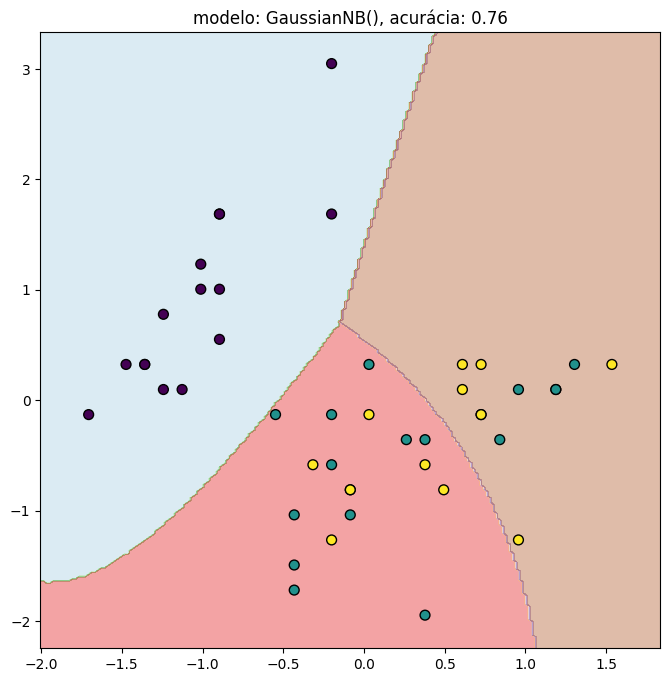

In [13]:
# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8)) 

# chama a funcao para plotar a superficie de decisao juntamente com os dados de teste
plota_superficieDecisao(df.loc[0].model.predict, X_test, Y_test, ax, title = 'modelo: '+ str(df.loc[0].model)+ ', acurácia: '+ str(round(df.loc[0].accuracy,2)))